test code

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import scipy.integrate as integrate 
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
from scipy.misc import derivative

In [71]:
graph = nx.Graph()

for node in range(1,37):
    graph.add_node(node)

print("-----------------")

for to_ in range(2,7):
    from_ = int(to_ - 1)
    graph.add_edge(from_, to_)
    graph.add_edge(from_, from_+6)

for to_ in range(2,7):
    from_ = int(to_ - 1)
    graph.add_edge(from_+6, to_+6)
    graph.add_edge(from_+6, from_+12)

for to_ in range(2,7):
    from_ = int(to_ - 1)
    graph.add_edge(from_+12, to_+12)
    graph.add_edge(from_+12, from_+18)

for to_ in range(2,7):
    from_ = int(to_ - 1)
    graph.add_edge(from_+18, to_+18)
    graph.add_edge(from_+18, from_+24)

for to_ in range(2,7):
    from_ = int(to_ - 1)
    graph.add_edge(from_+24, to_+24)
    graph.add_edge(from_+24, from_+30)

for to_ in range(2,7):
    from_ = int(to_ - 1)
    graph.add_edge(from_+30, to_+30)

list_add = [(6,12),(12,18),(18,24),(24,30),(30,36)]
for edge in list_add:
    graph.add_edge(*edge)

-----------------


In [67]:
graph.edges

EdgeView([(1, 2), (1, 7), (2, 3), (2, 8), (3, 4), (3, 9), (4, 5), (4, 10), (5, 6), (5, 11), (6, 12), (7, 8), (7, 13), (8, 9), (8, 14), (9, 10), (9, 15), (10, 11), (10, 16), (11, 12), (11, 17), (12, 18), (13, 14), (13, 19), (14, 15), (14, 20), (15, 16), (15, 21), (16, 17), (16, 22), (17, 18), (17, 23), (18, 24), (19, 20), (19, 25), (20, 21), (20, 26), (21, 22), (21, 27), (22, 23), (22, 28), (23, 24), (23, 29), (24, 30), (25, 26), (25, 30), (26, 27), (26, 31), (27, 28), (27, 32), (28, 29), (28, 33), (29, 30), (29, 34), (30, 36)])

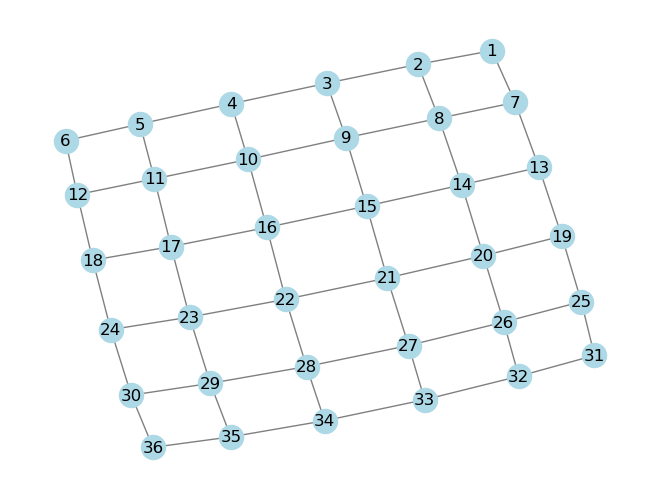

In [72]:

# Draw the graph
nx.draw(graph, with_labels=True, node_color='lightblue', edge_color='gray')

# Show the plot
plt.show()


In [73]:

list_nodes = list(graph.nodes)

#keys are just some number
#object is list of two lists, first list is central nodes, second list is corner nodes
dict_blocks = {}

node_i = 8

iter_ = 0

def common_rmv_round(graph, neighbors_node_, common_node):

    for node_ in neighbors_node_:
        neighbors_node__ = list(graph.neighbors(node_))
        for node_common in common_node:
            if node_common in neighbors_node__:
                common_node.append(node_)
                common_node = list(set(list(common_node)))
                neighbors_node_.remove(node_)        
    return neighbors_node_, common_node

def common_rmv(graph, neighbors_node_, common_node):

    for node_common in common_node:
        if node_common in neighbors_node_:
            neighbors_node_.remove(node_common)        
    return neighbors_node_, common_node


# for node_i in list_nodes:
neighbors_i = list(graph.neighbors(node_i))
neighbors_i_ = list(graph.neighbors(node_i))
nodes_common = []
for node_j in neighbors_i:
    neighbors_j = list(graph.neighbors(node_j))
    neighbors_j.remove(node_i)
    neighbors_i_.remove(node_j)
    #make sure that you remove common neighbors in neighbors_j
    for node_j_ in neighbors_i:
        if node_j != node_j_:
            neighbors_j_ = list(graph.neighbors(node_j_))
            for element in neighbors_j_:
                if element in neighbors_j:
                    neighbors_j.remove(element)
                    nodes_common.append(element)
                    nodes_common = list(set(list(nodes_common)))
    #continue to next node
    for node_k in neighbors_j:
        neighbors_k = list(graph.neighbors(node_k))
        neighbors_k.remove(node_j)
        #remove common neighbors
        neighbors_k, nodes_common = common_rmv_round(graph, neighbors_k, nodes_common)
        for node_l in neighbors_k:
            neighbors_l = list(graph.neighbors(node_l))
            neighbors_l.remove(node_k)
            # neighbors_l, nodes_common = common_rmv_round(graph, neighbors_l, nodes_common)
            #now we have (node_i, node_j, node_k, node_l)
            #go to row 2
            for node_m in neighbors_i_:
                #we don't want node_j to equal node_m
                neighbors_m = list(graph.neighbors(node_m))
                neighbors_m.remove(node_i)
                # neighbors_m, nodes_common = common_rmv(graph, neighbors_m, nodes_common)
                for node_n in neighbors_m:
                    neighbors_n = list(graph.neighbors(node_n))
                    neighbors_n.remove(node_m)
                    for node_o in neighbors_n:
                        if node_o != node_j:
                            neighbors_o = list(graph.neighbors(node_o))
                            neighbors_o.remove(node_n)
                            for node_p in neighbors_o:
                                if node_p != node_k:
                                    neighbors_p = list(graph.neighbors(node_p))
                                    neighbors_p.remove(node_o)
                                    #now we have (node_m, node_n, node_o, node_p)
                                    #if first row is connected to second row
                                    if (node_j in neighbors_n)&(node_k in neighbors_o)&(node_l in neighbors_p):
                                        #continue to third row
                                        for node_q in neighbors_m:
                                            neighbors_q = list(graph.neighbors(node_q))
                                            neighbors_q.remove(node_m)
                                            for node_r in neighbors_q:
                                                neighbors_r = list(graph.neighbors(node_r))
                                                neighbors_r.remove(node_q)
                                                for node_s in neighbors_r:
                                                    if node_s != node_n:
                                                        neighbors_s = list(graph.neighbors(node_s))
                                                        neighbors_s.remove(node_r)
                                                        for node_t in neighbors_s:
                                                            if node_t !=node_o:
                                                                neighbors_t = list(graph.neighbors(node_t))
                                                                neighbors_t.remove(node_s)
                                                                if (node_n in neighbors_r)&(node_o in neighbors_s)&(node_p in neighbors_t):
                                                                    #now we have (node_q, node_r, node_s, node_t)
                                                                    # print("third row",node_q, node_r, node_s, node_t)
                                                                    for node_w in neighbors_q:
                                                                        neighbors_w = list(graph.neighbors(node_w))
                                                                        neighbors_w.remove(node_q)
                                                                        for node_x in neighbors_w:
                                                                            neighbors_x = list(graph.neighbors(node_x))
                                                                            neighbors_x.remove(node_w)
                                                                            for node_y in neighbors_x:
                                                                                neighbors_y = list(graph.neighbors(node_y))
                                                                                neighbors_y.remove(node_x)
                                                                                for node_z in neighbors_y:
                                                                                    if node_z != node_s:
                                                                                        neighbors_z = list(graph.neighbors(node_z))
                                                                                        neighbors_z.remove(node_y)
                                                                                        if (node_r in neighbors_x)&(node_s in neighbors_y)&(node_t in neighbors_z):
                                                                                            # print("last row",node_w, node_x, node_y, node_z)
                                                                                            list_center = [node_n, node_o, node_r, node_s]
                                                                                            list_corner = [node_i, node_l, node_w, node_z]
                                                                                            dict_blocks[iter_] = [list_center, list_corner]
                                                                                            iter_ += 1

print("number of blocks",len(dict_blocks.keys()))
for block in dict_blocks.keys():
    print("block-------",block)
    print("center nodes",dict_blocks[block][0])
    print("corner nodes",dict_blocks[block][1])



number of blocks 1
block------- 0
center nodes [15, 16, 21, 22]
corner nodes [8, 11, 26, 29]
